# Calibrate Cremat Preamp + Shaper

See ./picoScopeControl for implementation of functions. picosdk required. run

 `python -m pip install . `

_after_ installing the picosdk on the system

## Open Device (only do once)

In [72]:
from picoScopeControl import *
from pprint import pprint
chandle = openDevice()
pprint(rangeMap)

Opening unit


PicoSDKCtypesError: PicoSDK returned 'PICO_NOT_FOUND'

### Configure metadata

In [40]:
metadata = {
    "switchconfig" : "00",
    "stacknum" : 2
}

## Test Measurement and Fit

In [ ]:
t, data = takeDataVal(chandle, .5, rangeMap[1], trigger=0.5, window=5e-6)
pps, errs = fitGaussian(t, data)
plt.plot(t, data)
plt.plot(t, gauss(t, *pps))
plt.show()

## Run Measurements

In [22]:

input_vs = np.linspace(.05, 2, 35) #input voltages to sweep
#trigger_mv = 200 #trigger
trigger_mvs = input_vs*1e3 #list version, NOTE must be in mv
window = 5e-6 #seconds, width of capture


initRange = rangeMap[2] #inial voltage range for device
t, datas = getSamples(chandle,input_vs, initRange, trigger_mvs, window)
#plotSample(t, data)
gains, gains_err = getGains(t, datas)

Setting square wave f=90 hz, A=0.05 V
Sampling Data. Channel=2, trigger=50.0mV, window=5e-06, range=7
Done

Setting square wave f=90 hz, A=0.1073529411764706 V
Sampling Data. Channel=2, trigger=107.3529411764706mV, window=5e-06, range=7
Done

Setting square wave f=90 hz, A=0.16470588235294117 V
Sampling Data. Channel=2, trigger=164.7058823529412mV, window=5e-06, range=7
Done

Setting square wave f=90 hz, A=0.22205882352941175 V
Sampling Data. Channel=2, trigger=222.05882352941174mV, window=5e-06, range=7
Done

Setting square wave f=90 hz, A=0.27941176470588236 V
Sampling Data. Channel=2, trigger=279.4117647058824mV, window=5e-06, range=7
Done

Setting square wave f=90 hz, A=0.3367647058823529 V
Sampling Data. Channel=2, trigger=336.7647058823529mV, window=5e-06, range=7
Done

Setting square wave f=90 hz, A=0.3941176470588235 V
Sampling Data. Channel=2, trigger=394.11764705882354mV, window=5e-06, range=7
Done

Setting square wave f=90 hz, A=0.45147058823529407 V
Sampling Data. Channel=2

35it [00:00, 327.05it/s]


## Create Plot

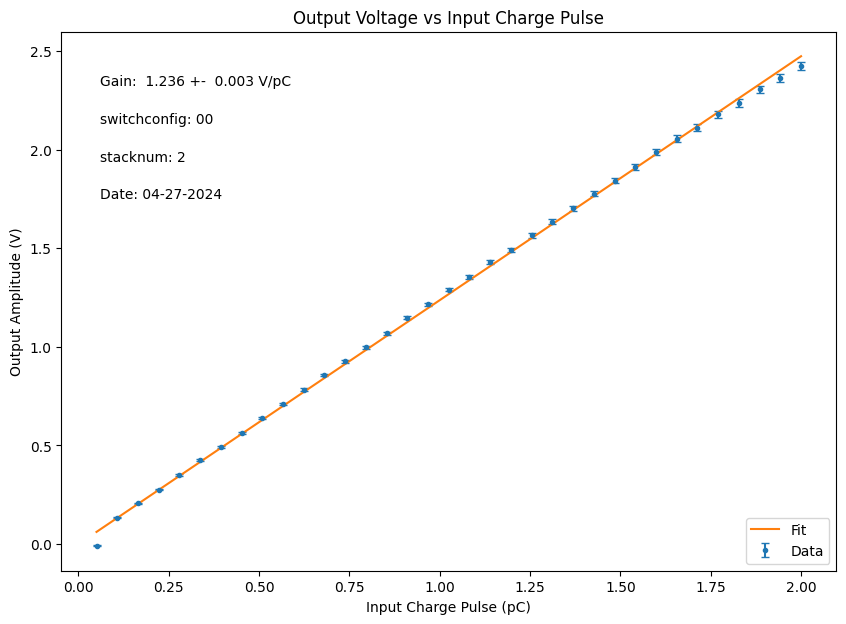

In [69]:
## DATE
from datetime import datetime
now = datetime.now() # current date and time
datestr = now.strftime("%m-%d-%Y")

## Convert units
input_charges = input_vs * 1 #times 1 pF, convert to pF
output_V = np.asarray(gains) * 1e-3 #mV to V
output_err = np.asarray(gains_err) * 1e-3

## Fit linear function
linear = lambda x, m: m*x
pps, cov = curve_fit(linear, input_charges, output_V)
perr = np.sqrt(np.diag(cov))


## Plot
plt.figure(figsize=(10, 7))

plt.errorbar(input_charges, output_V, yerr=output_err, capsize=3, fmt=".",
             label="Data")
plt.plot(input_charges, linear(input_charges, *pps), label="Fit")

plt.title("Output Voltage vs Input Charge Pulse")
plt.xlabel("Input Charge Pulse (pC)")
plt.ylabel("Output Amplitude (V)")
plt.legend(loc="lower right")


## annotations
x = .05
y = .9
y_spacing = 0.07

# Gain label
plt.annotate(f"Gain: {pps[0] : .4g} +- {perr[0] : .1g} V/pC", (x, y), xycoords="axes fraction")


# Label all metadata fields
for item in metadata.keys():
    y -= y_spacing #shift text down
    plt.annotate(f"{item}: {metadata[item]}", (x, y) , xycoords="axes fraction")

# label date of calibration
y -= y_spacing
plt.annotate(f"Date: {datestr}", (x, y) , xycoords="axes fraction")

## give file unique name, save to png and svg
out_name = f"out-{datestr}"
for key in metadata.keys():
    out_name += f"-{metadata[key]}"
    
plt.savefig(f"./out/{out_name}.svg")

plt.savefig(f"./out/{out_name}.png")


plt.show()

## Close Unit (do one at the end)

In [20]:
from picosdk.ps3000a import ps3000a as ps
print("Closing Unit")
# Closes the unit
# Handle = chandle
status = ps.ps3000aCloseUnit(chandle)
assert_pico_ok(status)

print("Closed")

Closing Unit
Closed


In [ ]:
pass